4. Лучший способ добиться успеха — следовать советам

✍ Что делать дальше?

*Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных.*
При подготовке датасета необходимо будет вспомнить все шаги, которые мы проделывали в модулях EDA. Нам нужно будет не только избавиться от пропущенных значений и нечисловых признаков, но и спроектировать новые признаки на основе информации, уже содержащейся в данных, или используя внешние источники данных, если это возможно. Также мы закодируем и преобразуем признаки, а после отберём лучшие из них.

Задачу, которая стоит перед вами, можно свести к пяти пунктам:
- Удаление строковых значений. Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.
- Очистка от пропущенных значений. На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.
- Создание новых признаков. Мы попробуем создать новые столбцы с данными из существующих данных или с использованием внешних источников.
- Преобразование признаков. Применим различные преобразования над признаками вроде нормализации, стандартизации.
- Отбор признаков. Используем анализ мультиколлинеарности как шаг отбора признаков для модели.

*Ваша задача — при помощи этих шагов и рекомендаций повысить качество предсказания. Чтобы понять, что качество улучшилось, ориентируйтесь на метрику MAPE: чем она меньше, тем лучше. Рассмотрим шаги подробнее.*

##### Строковые данные
В исходном наборе данных всего девять столбцов содержат числовые данные. Так что просто удалить все object-значения и считать задачу выполненной не получится. Мы сделали это в прошлом юните, чтобы получить значение метрики. Но чтобы улучшить качество модели, вам перед удалением придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

##### Пропущенные значения
Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Используйте знания из модулей очистки данных или вспомните о мере центральной тенденции в юнитах статистики. Попробуйте различные способы и ориентируйтесь на итоговую метрику.

##### Новые признаки
Это, пожалуй, самая творческая часть работы на данном шаге. Создание новых признаков потребует от вас способности вникать в контент, умения подключать к работе интуицию, творческого подхода и готовности к экспериментам. Попробуйте извлечь несколько признаков из даты, проанализируйте датасет на возможность добавления внешних источников данных. При наличии времени разберите текстовые столбцы на признаки.

##### Преобразование признаков
Данные могут быть представлены в невыгодном для модели свете. Используйте изученные вами способы преобразования данных, чтобы сделать данные качественнее.

##### Отбор признаков
Признаки могут дублировать информацию. Анализ мультиколлинеарности мы будем использовать, чтобы выбрать уникальные признаки для модели.

*Также перед обучением (после разделения выборки на X и y) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.*

Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

In [1]:
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('hotels.csv')
df.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [3]:
df.tail(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,9.2,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",74 days,51.515125,-0.160066
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208


In [69]:
num_hotels = df['hotel_name'].nunique()
print(f"В наборе данных представлено {num_hotels} уникальных отелей.")

В наборе данных представлено 1492 уникальных отелей.


* Что здесь происходит:
  - pd.to_datetime() — функция pandas, которая пытается превратить значения (строки, числа и др.) в даты.
  - df['review_date'] — столбец с исходными данными, которые могут быть в строковом формате или других.
  - Параметр errors='coerce' означает, что если какое-то значение невозможно преобразовать в дату (например, некорректная строка), то вместо ошибки будет записано значение NaT (Not a Time) — специальное        обозначение пропущенной даты.
* Зачем это нужно?
  - Для правильной работы с датами в pandas — например, сортировки по дате, вычисления разниц между датами, фильтрации по периоду.
* Приведение к датам позволяет избежать ошибок при работе с временными данными.

 - выводит значение переменной max_date в формате даты год-месяц-день (например, 2025-08-04).
*Здесь max_date — объект типа datetime или Timestamp в pandas, а метод .strftime('%Y-%m-%d') преобразует его в строку в заданном формате.*

In [4]:
# Преобразовать столбец с датами в формат datetime, если это ещё не сделано
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
# Найти максимальную дату
max_date = df['review_date'].max()
# Вывести дату в нужном формате yyyy-mm-dd
print(max_date.strftime('%Y-%m-%d'))

2017-08-03


In [5]:
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
min_date = df['review_date'].min()
print(min_date.strftime('%Y-%m-%d'))

2015-08-04


##### Чтобы проверить структуру столбца tags в вашем DataFrame df, можно выполнить несколько простых действий:

In [93]:
# 1 Посмотреть первые несколько значений столбца:
print(df['tags'].head(10))
# Это покажет, как выглядят теги — есть ли там списки, строки с разделителями, кавычки и т.д.

0    [' Leisure trip ', ' Couple ', ' Studio Suite ...
1    [' Business trip ', ' Couple ', ' Standard Dou...
2    [' Leisure trip ', ' Solo traveler ', ' Modern...
3    [' Leisure trip ', ' Solo traveler ', ' Standa...
4    [' Business trip ', ' Couple ', ' Standard Dou...
5    [' Business trip ', ' Solo traveler ', ' Super...
6    [' Leisure trip ', ' Couple ', ' Double Room N...
7    [' Leisure trip ', ' Couple ', ' Superior Doub...
8    [' Leisure trip ', ' Couple ', ' Double Room '...
9    [' Leisure trip ', ' Couple ', ' Twin Hilton G...
Name: tags, dtype: object


In [94]:
# 2 Узнать тип данных столбца:
print(df['tags'].dtype)

object


In [71]:
# 3 Посмотреть распределение или примеры уникальных значений:
print(df['tags'].dropna().unique()[:10])
# или
print(df['tags'].value_counts().head(10))

["[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"
 "[' Business trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']"
 "[' Leisure trip ', ' Solo traveler ', ' Modern Double Room Echo ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"
 "[' Leisure trip ', ' Solo traveler ', ' Standard Room with 1 Double Bed ', ' Stayed 1 night ']"
 "[' Business trip ', ' Couple ', ' Standard Double or Twin Room ', ' Stayed 6 nights ']"
 "[' Business trip ', ' Solo traveler ', ' Superior Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']"
 "[' Leisure trip ', ' Couple ', ' Double Room Non Smoking ', ' Stayed 1 night ', ' Submitted from a mobile device ']"
 "[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 4 nights ']"
 "[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ']"
 "[' Leisure trip ', ' Couple ', ' Twin Hilton Guest Room ', ' Stayed 1 night ', ' Submitted from a mo

In [95]:
# 4 Проверить, есть ли пустые или необычные значения:
print(df['tags'].isna().sum())    # количество пропусков
print(df.loc[df['tags'].isna()])  # строки с пропусками в tags
# означает, что в вашем DataFrame сейчас нет ни одной строки данных (пустой DataFrame).

0
Empty DataFrame
Columns: [hotel_address, additional_number_of_scoring, review_date, average_score, hotel_name, reviewer_nationality, negative_review, review_total_negative_word_counts, total_number_of_reviews, positive_review, review_total_positive_word_counts, total_number_of_reviews_reviewer_has_given, reviewer_score, tags, days_since_review, lat, lng, tags_list]
Index: []


In [96]:
# 5 Если значения в виде строк со списками или скобками, можно вывести срез по конкретной строке для подробного анализа:
print(df.loc[0, 'tags'])

[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']


In [97]:
import ast

# Преобразуем текстовое представление списка в настоящий список Python
df['tags_list'] = df['tags'].apply(ast.literal_eval)

# Теперь можно работать со списками тегов

# Разворачиваем списки тегов в одну плоскость
all_tags = [tag.strip() for sublist in df['tags_list'] for tag in sublist]

# Считаем уникальные теги
unique_tags = set(all_tags)
num_unique_tags = len(unique_tags)

print(f"Всего уникальных тегов: {num_unique_tags}")


Всего уникальных тегов: 2368


In [75]:
# Из-за этого, естественно, при попытке вывести примеры из столбца tags или других ничего не покажется.
# Что проверить дальше
#  Убедитесь, что данные действительно загружены в DataFrame df и он не пустой:
print(df.shape)  # Покажет количество строк и столбцов
print(df.head())  # Покажет первые несколько строк с данными

(386803, 18)
                                       hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   
3  216 Avenue Jean Jaures 19th arr 75019 Paris Fr...   
4          Molenwerf 1 1014 AG Amsterdam Netherlands   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   
2                            32  10/18/2016            8.9   
3                            34   9/22/2015            7.5   
4                           914    3/5/2016            8.5   

                                  hotel_name reviewer_nationality  \
0                         The May Fair Hotel      United Kingdom    
1            Mercure London Bloomsbury Hotel      United Kingdom    
2          Legend Saint Germain by Elegancia               China    
3

In [83]:
# Убираем пропуски в столбце с тегами
tags_series = df['tags'].dropna()
# Разбиваем строки на списки тегов по запятой
tags_lists = tags_series.str.split(',')
# Преобразуем в DataFrame, где каждая строка — один тег
tags_exploded = tags_lists.explode().str.strip()
# Считаем количество вхождений каждого тега (в скольких отзывах он встречается)
tag_counts = tags_exploded.value_counts()
# Получаем самый частотный тег
most_common_tag = tag_counts.idxmax()
most_common_count = tag_counts.max()
print(f"Тег, представленный в наибольшем числе отзывов: '{most_common_tag}', встречается в {most_common_count} отзывах.")

Тег, представленный в наибольшем числе отзывов: '[' Leisure trip '', встречается в 312768 отзывах.


In [84]:
tags_exploded = tags_lists.explode()
# Удаляем пробелы и кавычки вне зависимости, одинарные или двойные
tags_exploded = tags_exploded.str.strip().str.strip('"\'')
# Убираем пропуски в столбце с тегами
tags_series = df['tags'].dropna()
# Разбиваем строки на отдельные теги
tags_lists = tags_series.str.split(',')
# Разворачиваем список списков в один столбец
tags_exploded = tags_lists.explode().str.strip()
# Фильтруем теги, которые содержат упоминание ночей (например, "night" или "ночь")
nights_tags = tags_exploded[tags_exploded.str.contains('night|ночь', case=False, na=False)]
# Считаем количество каждого такого тега
nights_counts = nights_tags.value_counts()
# Получаем самый частотный тег и количество
most_common_nights_tag = nights_counts.idxmax()
most_common_nights_count = nights_counts.max()
print(f"Чаще всего путешественники останавливаются на: '{most_common_nights_tag}' (встречается в {most_common_nights_count} отзывах).")

Чаще всего путешественники останавливаются на: '' Stayed 1 night '' (встречается в 88083 отзывах).


In [85]:
import pandas as pd
import re
# Убираем пропуски
tags_series = df['tags'].dropna()
# Разбиваем строки на отдельные теги
tags_lists = tags_series.str.split(',')
# Разворачиваем в один столбец
tags_exploded = tags_lists.explode().str.strip().str.strip('"\'')
# Фильтруем теги, содержащие слово "night" или "ночь"
nights_tags = tags_exploded[tags_exploded.str.contains('night|ночь', case=False, na=False)]
# Функция для извлечения числа ночей из текста
def extract_nights(text):
    match = re.search(r'(\d+)', text)
    if match:
        return int(match.group(1))
    return None
# Применяем
nights_counts = nights_tags.apply(extract_nights).dropna()
# Считаем, какое число ночей встречается чаще всего
most_common_nights = nights_counts.mode()
if not most_common_nights.empty:
    print(f"Чаще всего путешественники останавливаются на {int(most_common_nights[0])} ночей.")
else:
    print("Не удалось определить наиболее частое количество ночей.")

Чаще всего путешественники останавливаются на 1 ночей.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

##### Удаление строковых значений. Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.

In [5]:
df1 = df.drop(['hotel_address', 'review_date', 'hotel_name', 'hotel_address', 'review_date', 'hotel_address', 'reviewer_nationality', 'negative_review', 
               'positive_review', 'tags', 'days_since_review'], axis = 1)
df1.head(2)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
0,581,8.4,3,1994,4,7,10.0,51.507894,-0.143671
1,299,8.3,3,1361,2,14,6.3,51.521009,-0.123097


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         384355 non-null  float64
 8   lng                                         384355 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


##### Очистка от пропущенных значений. На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.

In [7]:
# Проверим данные на наличие полных дубликатов:
print('Количество дубликатов: {}'.format(df1[df1.duplicated()].shape[0]))
# Удаляем дубликаты:
df1 = df1.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(df1.shape))

Количество дубликатов: 9090
Размер таблицы после удаления дубликатов: (377713, 9)


In [10]:
    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
    X = df.drop(['reviewer_score'], axis = 1)  
    y = df['reviewer_score']  
      
    # Загружаем специальный инструмент для разбивки:  
    from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
    # Для тестирования мы будем использовать 25 % от исходного датасета.  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         384355 non-null  float64
 8   lng                                         384355 non-null  float64
 9   tags_list                                   386803 non-null  object 
d

In [20]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = df1.drop(['reviewer_score'], axis = 1)  
y = df1['reviewer_score']  
y=y.astype('int') # означает, что объект y (например, столбец pandas.Series, содержащий данные) преобразуется к типу данных целое число (integer). 
# Метод astype() из библиотеки pandas служит для изменения типа данных элементов Series или DataFrame.
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # пример модели
from sklearn.metrics import mean_absolute_percentage_error
# Обучение модели (пример)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
# Предсказания на тесте
y_pred = model.predict(X_test)
# Расчёт MAPE
mape_value = mean_absolute_percentage_error(y_test, y_pred) * 100  # умножаем на 100 для %
print(f"MAPE на тестовой выборке: {mape_value:.2f}%")

ValueError: could not convert string to float: 'Pla a de Llevant s n Sant Mart 08019 Barcelona Spain'

Означают разделение вашего DataFrame df1 на два объекта:
X — это DataFrame, который содержит все признаки (фичи), кроме столбца 'reviewer_score'. Метод drop удаляет указанный столбец (axis=1 — значит по столбцам), и возвращает новый DataFrame без этого столбца.
y — это Series, который содержит только целевую переменную 'reviewer_score', то есть то, что вы хотите предсказывать или использовать как метку.
Такое разделение часто используется в задачах машинного обучения или анализа данных:
X — входные данные (признаки) для модели,
y — целевая переменная (ответ).
Это позволяет отдельно подготовить и обработать признаки и целевую переменную и затем обучить модель или провести анализ.

Что происходит при этом:

Все значения в y будут приведены к типу int (целое число).
Если в y изначально были значения в другом формате (например, строки чисел "1", "2" или числа с плавающей точкой 1.0, 2.7), после astype('int') они станут целыми числами (в случае с float — дробная часть отбрасывается).
Это важно, когда функции, например из sklearn, требуют определённого типа для целевой переменной — обычно целочисленного (например, метки классов).

Метод astype:
Работает для объектов типа pandas Series или DataFrame.
Принимает в аргумент тип данных, к которому нужно привести ('int', 'float', 'str', и др.).
Возвращает новый объект с преобразованными типами (если не использовать параметр copy=False, тогда можно изменить объект на месте).

Таким образом, ваш код y = y.astype('int') обеспечивает, что целевая переменная y будет именно целочисленной, что важно для корректной работы статистических и машинно-обучающих методов.

In [9]:
X.head(2)

NameError: name 'X' is not defined

In [109]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   lat                                         384355 non-null  float64
 7   lng                                         384355 non-null  float64
 8   tags_list                                   386803 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 26.6+ MB
None


In [108]:
display(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   lat                                         384355 non-null  float64
 7   lng                                         384355 non-null  float64
 8   tags_list                                   386803 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 26.6+ MB


None

In [31]:
y.head(2)

0    10
1     6
Name: reviewer_score, dtype: int32

In [15]:
display(y.info())

<class 'pandas.core.series.Series'>
Index: 377713 entries, 0 to 386802
Series name: reviewer_score
Non-Null Count   Dtype
--------------   -----
377713 non-null  int32
dtypes: int32(1)
memory usage: 4.3 MB


None

In [32]:
cat_cols = ['average_score', 'lat', 'lng']
X_filled = X[cat_cols].fillna(0)
(X_filled < 0).sum()

average_score         0
lat                   0
lng              192243
dtype: int64

In [33]:
#Правильная форма для выбора нескольких столбцов в pandas — использование списка с квадратными скобками: X_filled = X[['average_score', 'lat', 'lng']].fillna(0)
X_filled = X[['average_score', 'lat', 'lng']].fillna(0) 
(X_filled < 0).sum()

average_score         0
lat                   0
lng              192243
dtype: int64

Из перечисленных столбцов вашего DataFrame, основываясь на типах данных и типичной предметной логике, вот рекомендации по выделению категориальных признаков (cat_cols):

Ваши колонки и их типы:
Колонка	                                        Non-null	Тип данных	    Предположение о типе признака
additional_number_of_scoring	                386803	    int64	        Скорее количественный (числовой)
average_score	                                386803	    float64	        Скорее числовой (например, рейтинг)
review_total_negative_word_counts	            386803	    int64	        Количественный (число слов)
total_number_of_reviews	                        386803	    int64	        Количественный
review_total_positive_word_counts	            386803	    int64	        Количественный
total_number_of_reviews_reviewer_has_given      386803	    int64	        Количественный
reviewer_score	                                386803	    float64	        Целевая переменная (обычно числовая)
lat	                                            384355	    float64	        Географическая координата — непрерывный числовой
lng	                                            384355	    float64	        Географическая координата — непрерывный числовой

Категориальные признаки (cat_cols)
Категориальные (категории, классы, метки) — обычно признаками считаются дискретные переменные с конечным числом уникальных значений, значения которых нельзя упорядочивать как обычные числа (или по которым модель должна учитывать категорию, а не величину).

В вашем списке нет явно категориальных признаков с типом object или явных категорий (строковых, например, название города, тип, класс и т.п.).

Возможные варианты для категориальных:
Если у вас считаются average_score, lat, lng как категории (например, когда average_score дискретизируется в группы, или lat, lng округляются до района/зоны), тогда их можно считать категориальными после дискретизации/бинирования.

Если у вас есть отдельный список категориальных признаков, например, в исходных данных есть другие колонки с типом object или с небольшим числом уникальных значений, их надо добавить в cat_cols.

Итоговая рекомендация
Пока что, с указанными данными, все перечисленные признаки считаются числовыми (непрерывными).

Если вы хотите выделить категориальные признаки для задачи, то, скорее всего, вам нужно:

создать категориальные признаки, дискретизировав числовые (например, average_score разделить на категории: низкий, средний, высокий);

либо добавить в cat_cols признаки из других переменных, не перечисленных здесь.

Пример
python
num_cols = [
    'additional_number_of_scoring',
    'average_score',
    'review_total_negative_word_counts',
    'total_number_of_reviews',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'lat',
    'lng'
]

# Если дискретизировать average_score и координаты для категорий:
cat_cols = ['discretized_average_score', 'discretized_lat', 'discretized_lng']
Если вы предоставите список с другими признаками или поясните, какие колонки в исходных данных являются категориальными, смогу точнее помочь с cat_cols.

Если хотите, могу помочь с кодом для преобразования числовых признаков в категориальные (дискретизация и т.п.).

In [34]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', ...]
# категориальные признаки
cat_cols = ['average_score', 'lat', 'lng']

вы разделяете признаки (фичи) на два типа:

1. Непрерывные признаки (num_cols)
Это числовые переменные, которые могут принимать любые значения из некоторого числового диапазона, обычно с дробной частью или большим количеством уникальных значений. Примеры:
Количество отзывов (total_number_of_reviews)
Количество негативных слов в отзыве (review_total_negative_word_counts)
Эти признаки обычно используете в виде исходных чисел или подвергаете масштабированию и нормализации.

2. Категориальные признаки (cat_cols)
Это признаки, которые принимают ограниченный набор уникальных значений, часто качественные переменные или дискретные категории, например:
Средний балл (average_score) — если это дискретное значение с фиксированным набором вариантов
Географические координаты или коды районов (lat, но обычно координаты считаются числовыми, однако, если у вас они представлены как категории, например по зонам)
Категориальные признаки обычно не интерпретируются как числа с порядком или расстоянием, а используются как метки категорий. Перед применением моделей часто кодируют их через dummy-переменные (one-hot encoding) или применяют методы статистического анализа для категорий.

Почему важно разделять?
Для непрерывных признаков обычно используют методы регрессии, масштабирование и дискретизацию.
Для категориальных признаков — методы кодирования, статистические тесты для категорий (например, хи-квадрат), или специфические модели.

Что делать с ... в списках?
Троеточие ... — это сокращение, чтобы показать, что список признаков длинный или вы его продолжаете заполнить. Вам нужно заменить ... на реальные имена признаков вашего DataFrame.
Если хотите, могу помочь помочь с корректным определением непрерывных и категориальных признаков по вашему набору данных или с конкретным примером кода.

In [ ]:
cat_cols = ['average_score', 'lat', 'some_other_cat_feature', 'another_cat_feature']

In [35]:
# Если есть отрицательные значения, то:
# Попробуйте заменить их на 0 или другое подходящее неотрицательное значение, если это логично по задаче:
X_filled = X[cat_cols].fillna(0)
X_filled

,average_score,lat,lng
0,8.4,51.507894,-0.143671
1,8.3,51.521009,-0.123097
2,8.9,48.845377,2.325643
3,7.5,48.888697,2.394540
4,8.5,52.385601,4.847060
...,...,...,...
386798,9.0,51.494028,-0.191050
386799,8.4,48.192379,16.399451
386800,6.8,51.520795,-0.131084
386801,8.1,51.515125,-0.160066


In [16]:
X_filled = X_filled.clip(lower=0)  # Заменяет все отрицательные значения на 0
X_filled

,average_score,lat,lng
0,8.4,51.507894,0.000000
1,8.3,51.521009,0.000000
2,8.9,48.845377,2.325643
3,7.5,48.888697,2.394540
4,8.5,52.385601,4.847060
...,...,...,...
386798,9.0,51.494028,0.000000
386799,8.4,48.192379,16.399451
386800,6.8,51.520795,0.000000
386801,8.1,51.515125,0.000000


In [ ]:
print(X.dtypes)

In [36]:
from sklearn.impute import SimpleImputer

In [113]:
# Выделите числовые и категориальные признаки отдельно:
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

In [38]:
imputer_num = SimpleImputer(strategy='mean') # Для числовых признаков используйте SimpleImputer с подходящей стратегией:
X_num_filled = imputer_num.fit_transform(X[num_cols])

In [39]:
import numpy as np
X_num_filled_df = pd.DataFrame(X_num_filled, columns=num_cols, index=X.index)

In [40]:
display(cat_cols)
display(type(cat_cols))

Index(['tags_list'], dtype='object')

pandas.core.indexes.base.Index

builtins — это специальный модуль в Python, который содержит все встроенные функции, типы и исключения, доступные по умолчанию без необходимости их импортировать.
Например, встроенные функции print(), open(), len(), типы int, list и др. на самом деле доступны через модуль builtins: например, builtins.print, builtins.open.

*import builtins
builtins.print("Это вызов встроенной функции print, даже если print был переопределён")*

In [41]:
import builtins
builtins.print(cat_cols)
builtins.print(type(cat_cols))

Index(['tags_list'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [114]:
imputer_cat = SimpleImputer(strategy='most_frequent') # Для категориальных — можно заполнить наиболее частым значением:
X_cat_filled = imputer_cat.fit_transform(X[cat_cols])

TypeError: unhashable type: 'list'

In [42]:
print(type(X))
print(X.shape)
print(X.head())

<class 'pandas.core.frame.DataFrame'>
(386803, 9)
   additional_number_of_scoring  average_score  \
0                           581            8.4   
1                           299            8.3   
2                            32            8.9   
3                            34            7.5   
4                           914            8.5   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                  3                     1994   
1                                  3                     1361   
2                                  6                      406   
3                                  0                      607   
4                                  4                     7586   

   review_total_positive_word_counts  \
0                                  4   
1                                  2   
2                                  0   
3                                 11   
4                                 20   

   total_number_o

In [43]:
df_clean = pd.concat([X, y], axis=1).dropna()
X_clean = df_clean[X.columns]
y_clean = df_clean[y.name]

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Или 'mean', 'median' и т.д.
X_filled = imputer.fit_transform(X)
# Если y тоже содержит NaN (редко), можно обработать аналогично

In [45]:
print(cat_cols)

Index(['tags_list'], dtype='object')


In [ ]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
# imp_cat.sort_values(inplace = True)
# imp_cat.plot(kind = 'barh')

In [ ]:
делает следующее:

1. y = y.astype('int') — приводите целевую переменную к целочисленному типу, что требуется для работы со многими функциями машинного обучения и статистики.
   
2. chi2(X[cat_cols], y) — вызывает функцию из sklearn.feature_selection, которая для каждого признака из набора категориальных признаков X[cat_cols] вычисляет статистику теста хи-квадрат относительно целевой переменной y.
 - Входные данные X[cat_cols] должны содержать только неотрицательные числовые значения (частоты, индикаторы), без пропусков (NaN).
 - Цель теста — выявить, насколько каждый категориальный признак статистически связан с целевой переменной. Высокое значение статистики хи-квадрат говорит о сильной зависимости (значимости) признака для       классификации.

3. chi2(X[cat_cols], y) — берёт первый элемент результата, это массив значений статистик хи-квадрат для всех признаков.

4. pd.Series(..., index=cat_cols) — создаёт pandas Series, где индексами являются имена признаков, а значениями — вычисленные статистики хи-квадрат. Это удобно для анализа и визуализации.

5. imp_cat.sort_values(inplace=True) — сортирует признаки по возрастанию статистики хи-квадрат, чтобы легче было видеть самые и наименее значимые.

6. imp_cat.plot(kind='barh') — строит горизонтальную столбчатую диаграмму, визуализируя значимость категориальных признаков по их статистике хи-квадрат.

Таким образом, этот код помогает быстро оценить важность категориальных признаков относительно целевой переменной для задачи классификации, отделяя информативные признаки от менее значимых.

Для полной корректной работы:
 - X[cat_cols] не должен содержать NaN и отрицательных значений. При необходимости предварительно обработайте данные (заполните или удалите пропуски, преобразуйте категориальные переменные в числовые          индикаторы).
 - Целевая переменная y должна содержать метки классов в целочисленном виде.

Это классический подход для отбора признаков (feature selection) на основе теста хи-квадрат с помощью sklearn.
Если хотите, могу помочь с примером подготовки данных для этого теста или с интерпретацией результатов.
 - sklearn.feature_selection.chi2 documentation: computes chi-squared statistics for non-negative features relative to class labels
 - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
        
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # или 'median', или другая стратегия
X_num_filled = imputer.fit_transform(X[num_cols])

In [47]:
import numpy as np
print(np.isnan(X_num_filled).sum())  # должно быть 0

0


<Axes: >

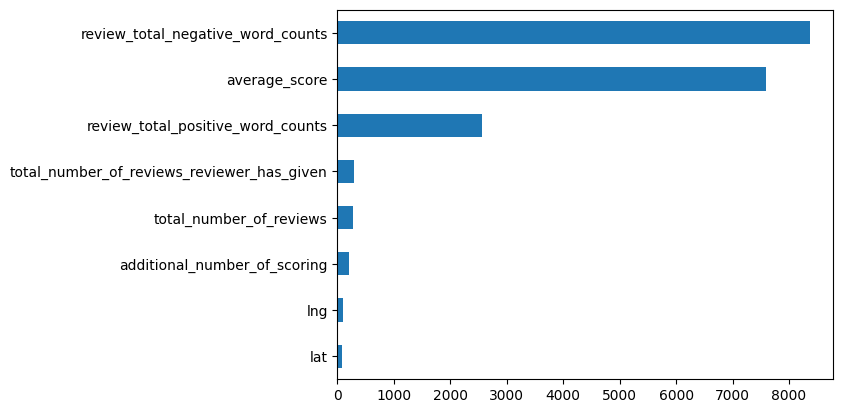

In [48]:
from sklearn.feature_selection import f_classif
imp_num = pd.Series(f_classif(X_num_filled, y)[0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

In [49]:
num_hotels = df['hotel_name'].nunique()
print(f"В наборе данных представлено {num_hotels} уникальных отелей.")

В наборе данных представлено 1492 уникальных отелей.


In [98]:
# Предположим, столбец с тегами называется 'tags'
# Разобьём все теги на отдельные элементы и составим множество уникальных
all_tags = df['tags'].dropna().str.split(',')  # Разделение по запятой, если другой разделитель — замените
unique_tags = set(tag.strip() for sublist in all_tags for tag in sublist)
num_unique_tags = len(unique_tags)
print(f"Всего уникальных тегов: {num_unique_tags}")

Всего уникальных тегов: 2413


In [99]:
# Убираем пропуски
tags_series = df['tags'].dropna()
# Разбиваем строки на списки тегов (уточните разделитель, если не запятая)
tags_lists = tags_series.str.split(',')
# Разворачиваем в один плоский список
all_tags = [tag.strip().strip('"\'' ) for sublist in tags_lists for tag in sublist if tag.strip()]
# Получаем множество уникальных тегов
unique_tags = set(all_tags)
num_unique_tags = len(unique_tags)
print(f"Всего уникальных тегов: {num_unique_tags}")

Всего уникальных тегов: 2413


##### Чтобы проверить структуру столбца tags в вашем DataFrame df, можно выполнить несколько простых действий:

In [100]:
# Посмотреть первые несколько значений столбца:
print(df['tags'].head(10))
# Это покажет, как выглядят теги — есть ли там списки, строки с разделителями, кавычки и т.д.

0    [' Leisure trip ', ' Couple ', ' Studio Suite ...
1    [' Business trip ', ' Couple ', ' Standard Dou...
2    [' Leisure trip ', ' Solo traveler ', ' Modern...
3    [' Leisure trip ', ' Solo traveler ', ' Standa...
4    [' Business trip ', ' Couple ', ' Standard Dou...
5    [' Business trip ', ' Solo traveler ', ' Super...
6    [' Leisure trip ', ' Couple ', ' Double Room N...
7    [' Leisure trip ', ' Couple ', ' Superior Doub...
8    [' Leisure trip ', ' Couple ', ' Double Room '...
9    [' Leisure trip ', ' Couple ', ' Twin Hilton G...
Name: tags, dtype: object


In [101]:
# Узнать тип данных столбца:
print(df['tags'].dtype)

object


In [102]:
# Посмотреть распределение или примеры уникальных значений:
print(df['tags'].dropna().unique()[:10])
# или
print(df['tags'].value_counts().head(10))

["[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"
 "[' Business trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']"
 "[' Leisure trip ', ' Solo traveler ', ' Modern Double Room Echo ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"
 "[' Leisure trip ', ' Solo traveler ', ' Standard Room with 1 Double Bed ', ' Stayed 1 night ']"
 "[' Business trip ', ' Couple ', ' Standard Double or Twin Room ', ' Stayed 6 nights ']"
 "[' Business trip ', ' Solo traveler ', ' Superior Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']"
 "[' Leisure trip ', ' Couple ', ' Double Room Non Smoking ', ' Stayed 1 night ', ' Submitted from a mobile device ']"
 "[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 4 nights ']"
 "[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ']"
 "[' Leisure trip ', ' Couple ', ' Twin Hilton Guest Room ', ' Stayed 1 night ', ' Submitted from a mo

In [103]:
# Проверить, есть ли пустые или необычные значения:
print(df['tags'].isna().sum())    # количество пропусков
print(df.loc[df['tags'].isna()])  # строки с пропусками в tags
# означает, что в вашем DataFrame сейчас нет ни одной строки данных (пустой DataFrame).

0
Empty DataFrame
Columns: [hotel_address, additional_number_of_scoring, review_date, average_score, hotel_name, reviewer_nationality, negative_review, review_total_negative_word_counts, total_number_of_reviews, positive_review, review_total_positive_word_counts, total_number_of_reviews_reviewer_has_given, reviewer_score, tags, days_since_review, lat, lng, tags_list]
Index: []


In [104]:
# Если значения в виде строк со списками или скобками, можно вывести срез по конкретной строке для подробного анализа:
print(df.loc[0, 'tags'])

[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']


In [105]:
# Из-за этого, естественно, при попытке вывести примеры из столбца tags или других ничего не покажется.
# Что проверить дальше
#  Убедитесь, что данные действительно загружены в DataFrame df и он не пустой:
print(df.shape)  # Покажет количество строк и столбцов
print(df.head())  # Покажет первые несколько строк с данными

(386803, 18)
                                       hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   
3  216 Avenue Jean Jaures 19th arr 75019 Paris Fr...   
4          Molenwerf 1 1014 AG Amsterdam Netherlands   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   
2                            32  10/18/2016            8.9   
3                            34   9/22/2015            7.5   
4                           914    3/5/2016            8.5   

                                  hotel_name reviewer_nationality  \
0                         The May Fair Hotel      United Kingdom    
1            Mercure London Bloomsbury Hotel      United Kingdom    
2          Legend Saint Germain by Elegancia               China    
3

In [106]:
import ast
# Преобразуем текстовое представление списка в настоящий список Python
df['tags_list'] = df['tags'].apply(ast.literal_eval)
# Теперь можно работать со списками тегов
# Разворачиваем списки тегов в одну плоскость
all_tags = [tag.strip() for sublist in df['tags_list'] for tag in sublist]
# Считаем уникальные теги
unique_tags = set(all_tags)
num_unique_tags = len(unique_tags)
print(f"Всего уникальных тегов: {num_unique_tags}")

Всего уникальных тегов: 2368


In [59]:
# Убираем пропуски в столбце с тегами
tags_series = df['tags'].dropna()
# Разбиваем строки на списки тегов по запятой
tags_lists = tags_series.str.split(',')
# Преобразуем в DataFrame, где каждая строка — один тег
tags_exploded = tags_lists.explode().str.strip()
# Считаем количество вхождений каждого тега (в скольких отзывах он встречается)
tag_counts = tags_exploded.value_counts()
# Получаем самый частотный тег
most_common_tag = tag_counts.idxmax()
most_common_count = tag_counts.max()
print(f"Тег, представленный в наибольшем числе отзывов: '{most_common_tag}', встречается в {most_common_count} отзывах.")

Тег, представленный в наибольшем числе отзывов: '[' Leisure trip '', встречается в 312768 отзывах.


In [60]:
tags_exploded = tags_lists.explode()
# Удаляем пробелы и кавычки вне зависимости, одинарные или двойные
tags_exploded = tags_exploded.str.strip().str.strip('"\'')
# Убираем пропуски в столбце с тегами
tags_series = df['tags'].dropna()
# Разбиваем строки на отдельные теги
tags_lists = tags_series.str.split(',')
# Разворачиваем список списков в один столбец
tags_exploded = tags_lists.explode().str.strip()
# Фильтруем теги, которые содержат упоминание ночей (например, "night" или "ночь")
nights_tags = tags_exploded[tags_exploded.str.contains('night|ночь', case=False, na=False)]
# Считаем количество каждого такого тега
nights_counts = nights_tags.value_counts()
# Получаем самый частотный тег и количество
most_common_nights_tag = nights_counts.idxmax()
most_common_nights_count = nights_counts.max()
print(f"Чаще всего путешественники останавливаются на: '{most_common_nights_tag}' (встречается в {most_common_nights_count} отзывах).")

Чаще всего путешественники останавливаются на: '' Stayed 1 night '' (встречается в 88083 отзывах).


In [61]:
import pandas as pd
import re
# Убираем пропуски
tags_series = df['tags'].dropna()
# Разбиваем строки на отдельные теги
tags_lists = tags_series.str.split(',')
# Разворачиваем в один столбец
tags_exploded = tags_lists.explode().str.strip().str.strip('"\'')
# Фильтруем теги, содержащие слово "night" или "ночь"
nights_tags = tags_exploded[tags_exploded.str.contains('night|ночь', case=False, na=False)]
# Функция для извлечения числа ночей из текста
def extract_nights(text):
    match = re.search(r'(\d+)', text)
    if match:
        return int(match.group(1))
    return None
# Применяем
nights_counts = nights_tags.apply(extract_nights).dropna()
# Считаем, какое число ночей встречается чаще всего
most_common_nights = nights_counts.mode()
if not most_common_nights.empty:
    print(f"Чаще всего путешественники останавливаются на {int(most_common_nights[0])} ночей.")
else:
    print("Не удалось определить наиболее частое количество ночей.")

Чаще всего путешественники останавливаются на 1 ночей.


In [90]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)


In [91]:
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()


In [92]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Преобразование данных (если X одномерный)
X_train = np.array(X_train)
X_test = np.array(X_test)
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mape_value = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE на тестовой выборке: {mape_value:.2f}%")


ValueError: setting an array element with a sequence.

In [65]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # пример модели
from sklearn.metrics import mean_absolute_percentage_error

# Обучение модели (пример)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказания на тесте
y_pred = model.predict(X_test)

# Расчёт MAPE
mape_value = mean_absolute_percentage_error(y_test, y_pred) * 100  # умножаем на 100 для %
print(f"MAPE на тестовой выборке: {mape_value:.2f}%")


ValueError: setting an array element with a sequence.

Какое значение метрики MAPE вам удалось получить на этом этапе?

In [63]:
y = y.astype(int).fillna(0)  # или другой метод обработки NaN

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2  https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

*→ Тесты chi2 и f_classif можно использовать для выбора n заданных признаков с наивысшими значениями статистик с помощью метода SelectKBest. Подробнее об этом вы можете прочесть в руководстве Feature selection.* https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [ ]:
Задание 4.1 (на самопроверку)
Дополните списки num_cols и cat_cols для оценки значимости всех признаков.